Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
total_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

# Display the data table for preview
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice = total_data["Mouse ID"].nunique()
print (unique_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = total_data[total_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids



array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_data = total_data[total_data["Mouse ID"].isin(duplicate_mouse_id)]  
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.  (chatgpt helped with the tilda explanation)
clean_data = total_data[~total_data["Mouse ID"].isin(duplicate_mouse_id)]
clean_data.head()
 




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_method = clean_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
agg_method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

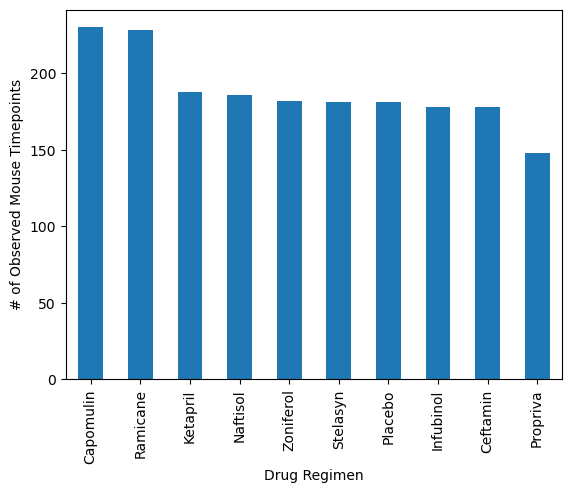

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count = clean_data['Drug Regimen'].value_counts()
regimen_count.head()

regimen_visual = regimen_count.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints',)

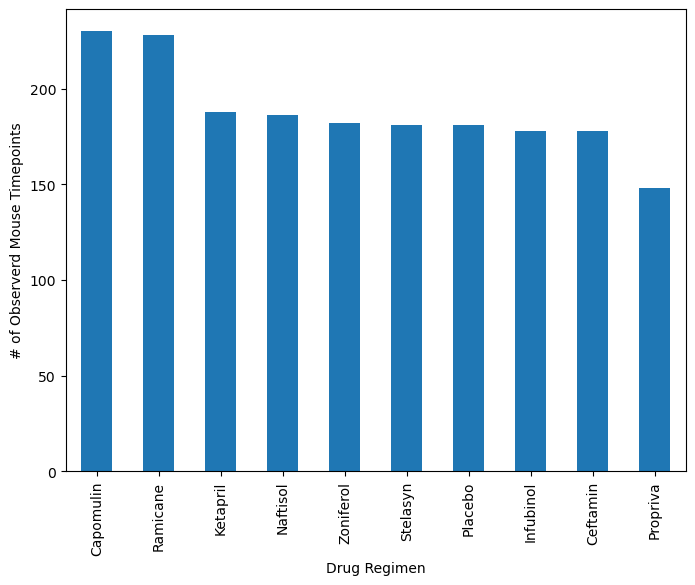

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_count.plot(kind='bar', figsize=(8,6))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observerd Mouse Timepoints')
plt.show()

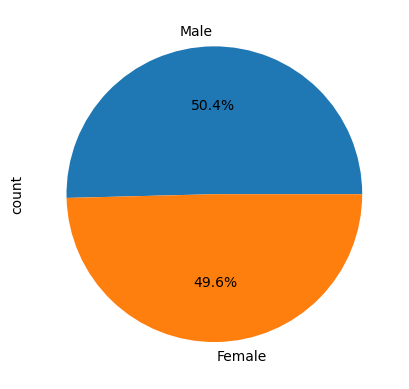

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_data = clean_data[['Mouse ID', "Sex"]].drop_duplicates()
gender_counts = gender_data ["Sex"].value_counts()
gender_visual = gender_counts.plot(kind='pie', title="", y= "Sex", autopct='%1.1f%%')

# Make the pie chart


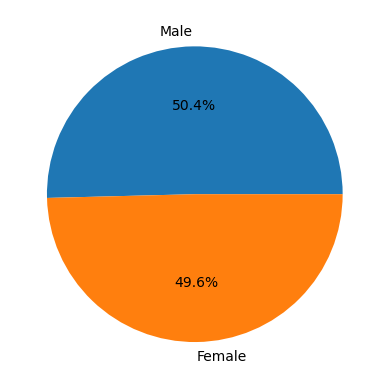

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

plt.pie(gender_counts, autopct="%1.1f%%", labels=gender_counts.index)
plt.show()
# Make the pie chart


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
#chatgpt helped write this code.
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = pd.merge(clean_data, greatest_timepoint, on=['Mouse ID', 'Timepoint'], how='right')
last_timepoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the Inter-Quartile-Range and quantitatively determine if there are any potential outliers.

#chatgpt helped write this code.
for drug in drug_regimen:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = last_timepoint[last_timepoint['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Calculate the IQR
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    # Append the tumor volume data to the list
    tumor_vol.append(drug_data)
    
    print(f"{drug} potential outliers: {outliers}")




Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

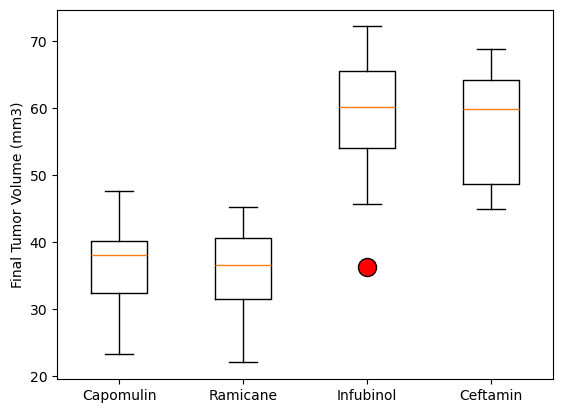

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
#searched online for help with styling
plt.boxplot(tumor_vol, tick_labels=drug_regimen, flierprops=dict(markerfacecolor='r', marker='o', markersize=13))
plt.ylabel('Final Tumor Volume (mm3)')  

## Line and Scatter Plots

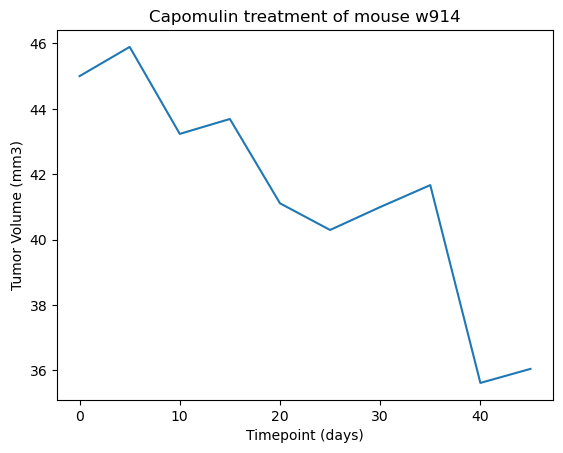

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_w914 = clean_data[clean_data['Mouse ID'] == 'w914']
plt.plot(mouse_w914['Timepoint'], mouse_w914['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse w914')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

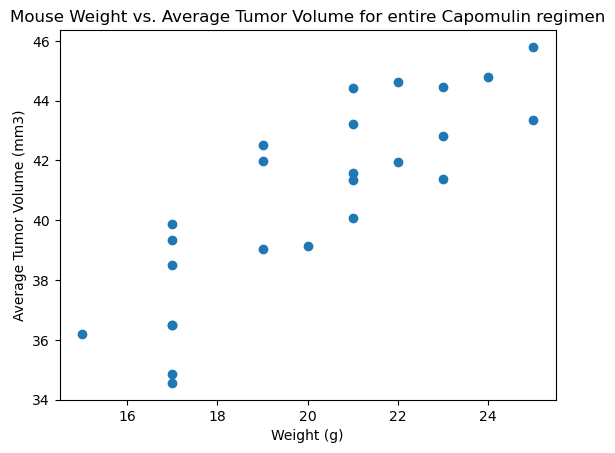

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#chatgpt helped with this code.
entire_capomulin = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = entire_capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
gram_weight = entire_capomulin.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(gram_weight, avg_tumor_vol)
plt.title('Mouse Weight vs. Average Tumor Volume for entire Capomulin regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


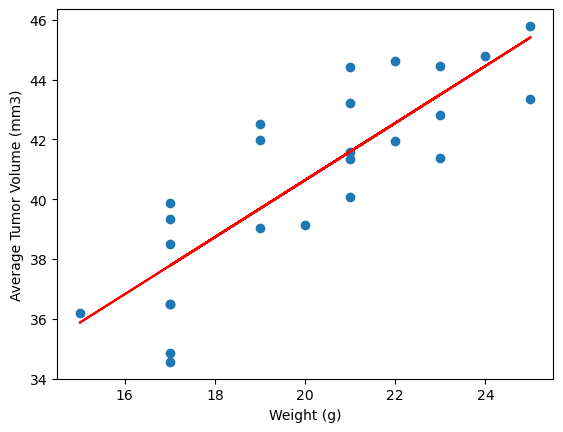

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#help from chatgpt to understand the correlation coefficient and linear regression model
corr_coef = st.pearsonr(gram_weight, avg_tumor_vol)
rounded_corr_coef = round(corr_coef[0], 2)
print(f'The correlation between mouse weight and average tumor volume is {rounded_corr_coef}')

#plotting the linear regression model
x_values = gram_weight
y_values = avg_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regression_line = slope * x_values + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
